In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

In [46]:
import sys
sys.path.insert(1, '..')
from utils import functions as func

### Cargamos nuestros datos de entrenamiento y test

In [47]:
X_train, X_test, y_train, y_test = func.load_train_sets(path = "data\processed/train_set.npz")
X_train_corr, X_test_corr, y_train_corr, y_test_corr = func.load_train_sets(path = "data\processed/train_set_corr.npz")
X_train_norm, X_test_norm, y_train_norm, y_test_norm = func.load_train_sets(path = "data\processed/train_set_norm.npz")
X_norm_corr, X_norm_corr, y_norm_corr, y_norm_corr = func.load_train_sets(path = "data\processed/train_norm_corr.npz")

### Entrenamos nuestro modelo con varios parámetros y con todos los datos sin normalizar

In [30]:
param_random_forest = {"n_estimators": [100, 200, 500], 

                     
                     "max_depth": [5,10,15,20],
                      
                     "max_features": ["sqrt", 3, 4, 7] 
                                                    
                     }
grid_rand_todos = GridSearchCV(estimator = RandomForestRegressor(),
                  param_grid = param_random_forest,
                  cv = 5)                     
                   

In [31]:
grid_rand_todos.fit(X_train,y_train) 

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_features': ['sqrt', 3, 4, 7],
                         'n_estimators': [100, 200, 500]})

In [32]:
print(grid_rand_todos.best_estimator_)
print(grid_rand_todos.best_score_)
print(grid_rand_todos.best_params_)

RandomForestRegressor(max_depth=10, max_features=4)
0.8793878113095637
{'max_depth': 10, 'max_features': 4, 'n_estimators': 100}


In [33]:
pred_todos = grid_rand_todos.best_estimator_.predict(X_test)

#### Observamos las métricas

In [34]:
func.muestra_metricas(data = y_test, data_pred = pred_todos)

MAE: 0.7485748092763552
MSE: 1.5527062126932725
RMSE: 1.2460763269933637
R2 score: 0.8859276844071695


#### Graficamos

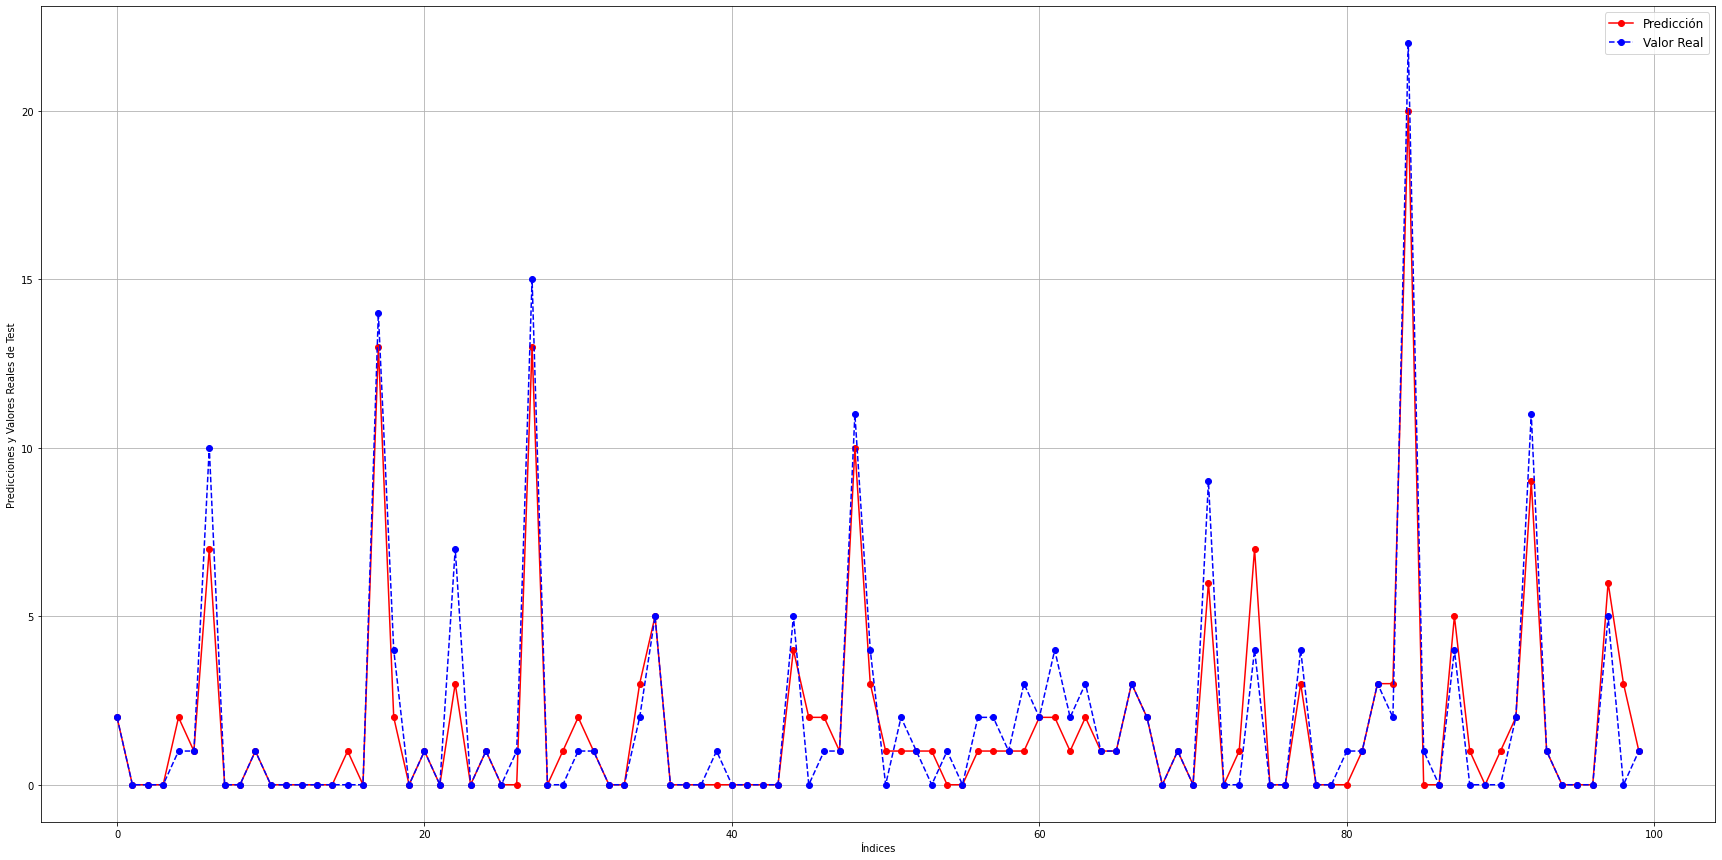

In [35]:
func.muestra_pred(data = y_test, data_pred = np.round(pred_todos,0), long = 100, path = "D:\Jesus\BootCampThe_Bridge\Clases\Alumno\Entregables\Proyecto_ML\src\data\images\Random Forest Todos.jpg" )

### Entrenamos con los datos más correlados, sin normalizar

In [48]:
random_forest_params_2 = {
        'max_features': [4],
        'n_estimators': [100, 200, 500, 1000],
        'max_depth': [5,10,15],
        'random_state':[42]
}
grid_reg_corr = GridSearchCV(estimator = RandomForestRegressor(),
                  param_grid = random_forest_params_2,
                  cv = 3)

In [49]:
grid_reg_corr.fit(X_train_corr,y_train_corr)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15], 'max_features': [4],
                         'n_estimators': [100, 200, 500, 1000],
                         'random_state': [42]})

In [38]:
print(grid_reg_corr.best_estimator_)
print(grid_reg_corr.best_score_)
print(grid_reg_corr.best_params_)

RandomForestRegressor(max_depth=10, max_features=4, n_estimators=1000,
                      random_state=42)
0.8679901407509195
{'max_depth': 10, 'max_features': 4, 'n_estimators': 1000, 'random_state': 42}


In [50]:
pred_corr = grid_reg_corr.best_estimator_.predict(X_test_corr)

#### Observamos las métricas

In [40]:
func.muestra_metricas(data = y_test_corr, data_pred = pred_corr)

MAE: 0.7614416820211737
MSE: 1.5964674491965398
RMSE: 1.2635139291660142
R2 score: 0.882712687558233


#### Graficamos

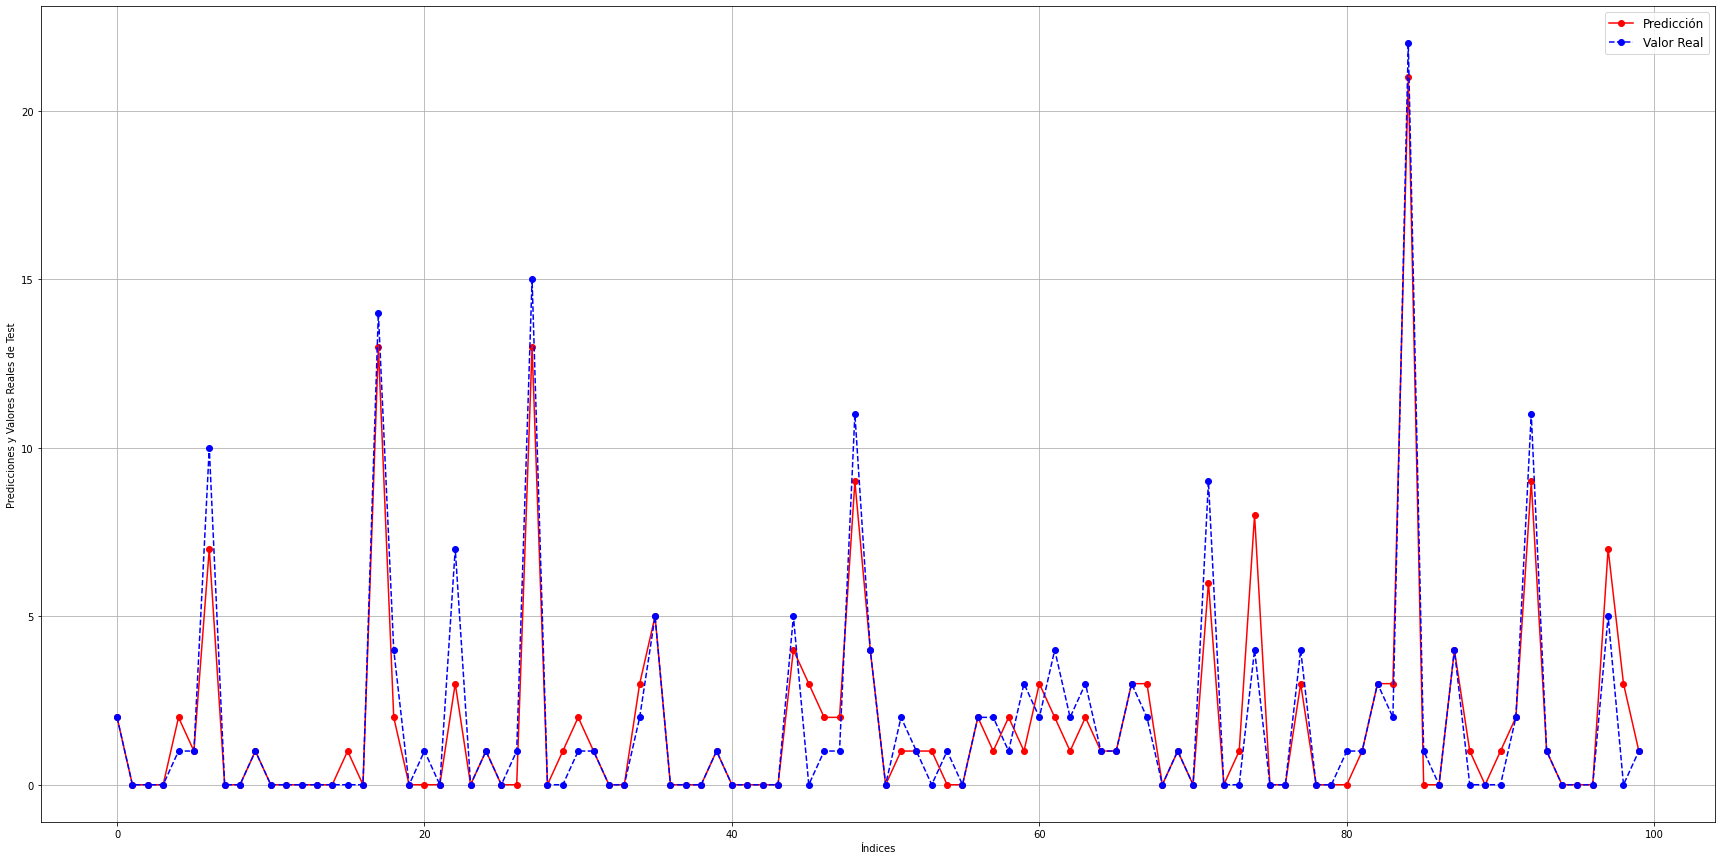

In [41]:
func.muestra_pred(data = y_test_corr, data_pred = np.round(pred_corr,0), long = 100, path = "D:\Jesus\BootCampThe_Bridge\Clases\Alumno\Entregables\Proyecto_ML\src\data\images\Random Forest Corr.jpg" )

### Entrenamos con los datos normalizados

In [5]:
param_random_forest = {"n_estimators": [100, 200, 500], 

                     
                     "max_depth": [5,10,15,20],
                      
                     "max_features": ["sqrt", 3, 4, 7] 
                                                    
                     }
grid_rand_norm = GridSearchCV(estimator = RandomForestRegressor(),
                  param_grid = param_random_forest,
                  cv = 5)  

In [6]:
grid_rand_norm.fit(X_train_norm_corr,y_train_norm_corr) 

C:\Users\Jesús\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Jesús\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Jesús\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Jesús\AppData\Local\Programs\Python\Python37\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Jesús\AppData\Local\Programs\Python\Python37\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Jesús\AppData\Loc

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_features': ['sqrt', 3, 4, 7],
                         'n_estimators': [100, 200, 500]})

In [7]:
print(grid_rand_norm.best_estimator_)
print(grid_rand_norm.best_score_)
print(grid_rand_norm.best_params_)

RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=500)
0.8152943044052741
{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 500}


In [39]:
rand_norm_reg = RandomForestRegressor(max_depth=10, max_features= 4, n_estimators=500)

In [40]:
rand_norm_reg.fit(X_train_norm_corr, y_train_norm_corr)

RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=500)

In [41]:
pred_rand_norm = np.expm1(rand_norm_reg.predict(X_test_norm_corr))

In [42]:
func.muestra_metricas(data = y_test_corr, data_pred = pred_rand_norm)

MAE: 0.7731102241169601
MSE: 1.7432543375533565
RMSE: 1.320323573050696
R2 score: 0.8719287284830102


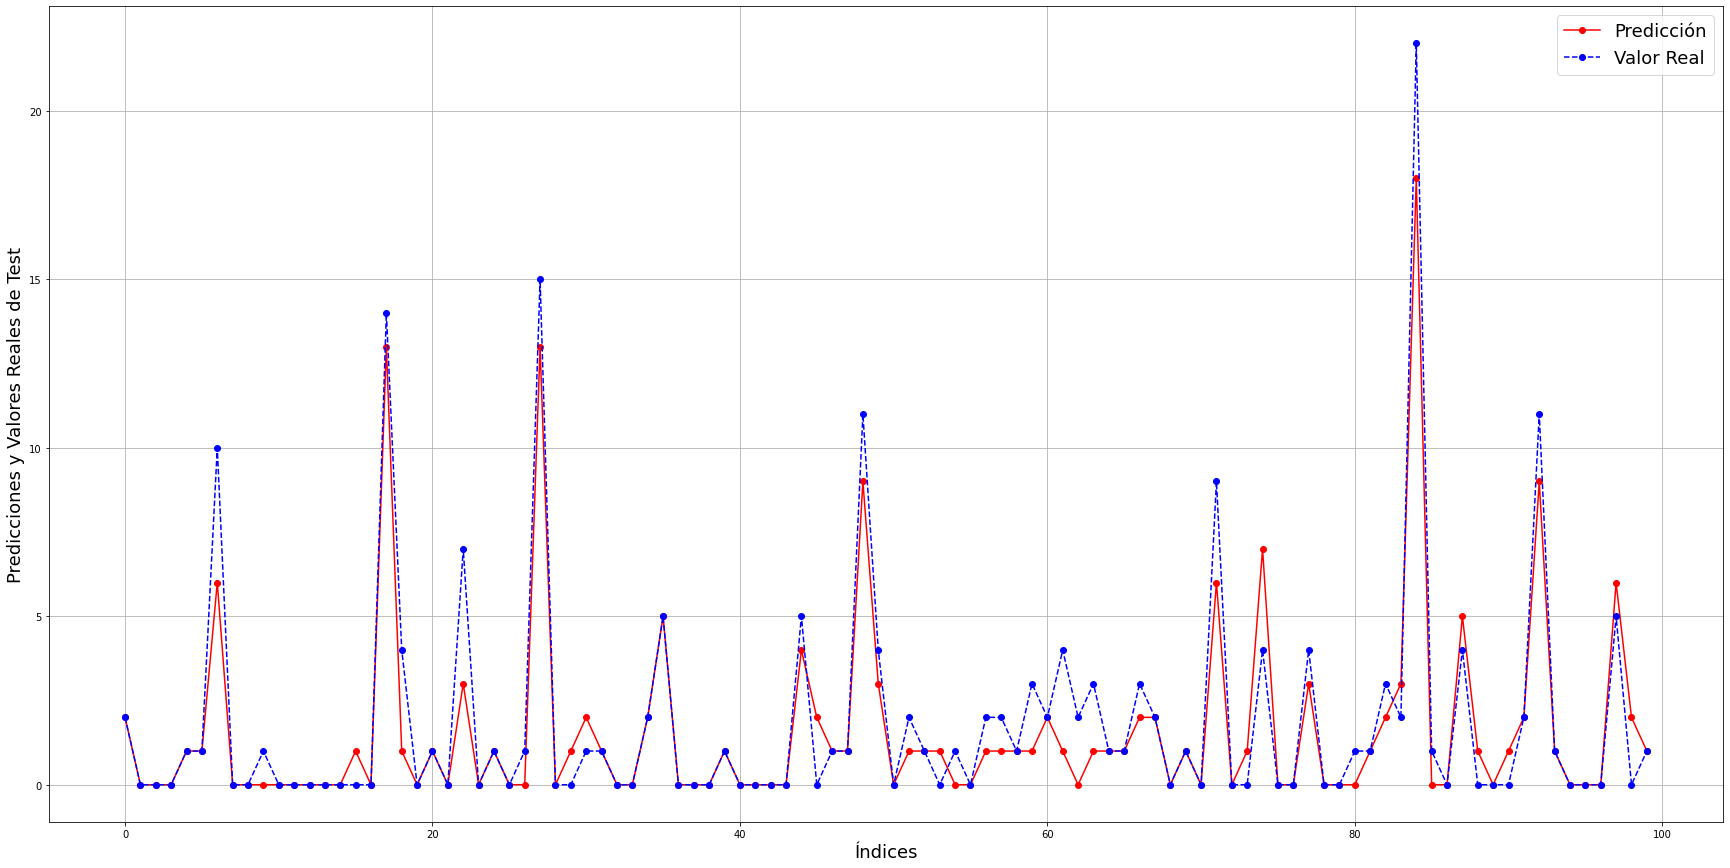

In [34]:
func.muestra_pred(data = y_test_corr, data_pred = np.round(pred_rand_norm,0), long = 100, path = "D:\Jesus\BootCampThe_Bridge\Clases\Alumno\Entregables\Proyecto_ML\src\data\images\Random Forest Norm Corr.jpg" )

In [45]:
names = ['position','squad','minutes','xg_per90','shoots_on_t_x_game','passes_x_game','dribbles_x_game']

In [46]:
from sklearn.feature_selection import SelectKBest

print(X_train.shape)
sel = SelectKBest(k=5)
X_new = sel.fit_transform(X_train, y_train)
print(X_new.shape)
print(sel.scores_)

feat_imp_modelo = pd.DataFrame({'column': names, 'score': sel.scores_}).sort_values('score', ascending=False)

(5157, 7)
(5157, 5)
[39.37731392  5.55666281 60.40515254 49.00977036 38.91665644  0.95207819
  1.82204765]


In [47]:
feat_imp_modelo.to_csv(r'D:\Jesus\BootCampThe_Bridge\Clases\Alumno\Entregables\Proyecto_ML\src\data\processed\feature_importance.csv', sep = ';')

### Guardamos el modelo que mejor resultado ha obtenido.

In [48]:
func.guarda_modelo(modelo = grid_rand_todos.best_estimator_, path = "D:\Jesus\BootCampThe_Bridge\Clases\Alumno\Entregables\Proyecto_ML\src\models/rand_forest_reg.model")

In [51]:
dict_pred = {'Valor Real': y_test_corr[70:91],'Predicción': np.round(pred_corr[70:91],0)}
df_prediccion = pd.DataFrame(dict_pred)
df_prediccion.to_csv('D:\Jesus\BootCampThe_Bridge\Clases\Alumno\Entregables\Proyecto_ML\src\data\processed\Prediciones rand_corr.csv', sep = ';')
df_prediccion

,Valor Real,Predicción
0,0.0,0.0
1,9.0,6.0
2,0.0,0.0
3,0.0,1.0
4,4.0,8.0
5,0.0,0.0
6,0.0,0.0
7,4.0,3.0
8,0.0,0.0
9,0.0,0.0
